In [8]:
import pandas as pd
import numpy as np

from tensorflow import random

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [18]:
X = pd.read_csv('datasets/traffic_volume_feats.csv')
y = pd.read_csv('datasets/traffic_volume_target.csv')

In [19]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) 

## Modelo 1

Menor erro no treino:  24.943868820667266
Menor erro na validação:  24.943868820667266


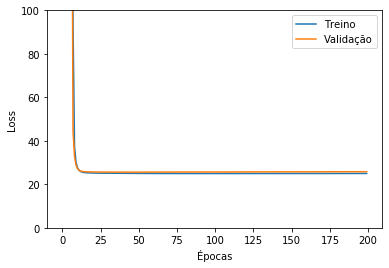

In [22]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), verbose=0, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 100)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])
print('Menor erro no treino: ', min(history.history['loss']))
print('Menor erro na validação: ', min(history.history['loss']))
plt.show()

## Modelo 2 (com Dropout em uma hidden layer)

Menor erro no treino:  230.4578051185608
Menor erro na validação:  230.4578051185608


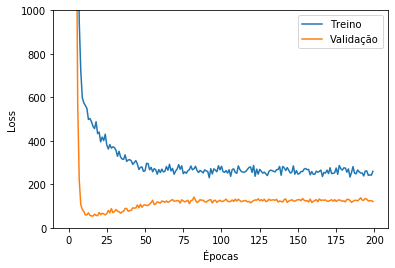

In [24]:
model_2 = Sequential()
model_2.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dropout(0.1))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='rmsprop', loss='mean_squared_error')
history = model_2.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), verbose=0, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1000)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])
print('Menor erro no treino: ', min(history.history['loss']))
print('Menor erro na validação: ', min(history.history['loss']))
plt.show()

## Modelo 3 (com Dropout em várias todas as hidden layers)

Menor erro no treino:  742.3018608093262
Menor erro na validação:  742.3018608093262


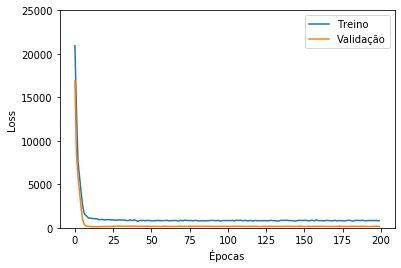

In [26]:
model_3 = Sequential()
model_3.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dropout(0.2))
model_3.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model_3.add(Dense(1))
model_3.compile(optimizer='rmsprop', loss='mean_squared_error')
history = model_3.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), verbose=0, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 25000)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])
print('Menor erro no treino: ', min(history.history['loss']))
print('Menor erro na validação: ', min(history.history['loss']))
plt.show()